   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

C:\Users\nh013\AppData\Local\Temp\ipykernel_9416\364877111.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
C:\Users\nh013\AppData\Local\Temp\ipykernel_9416\364877111.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


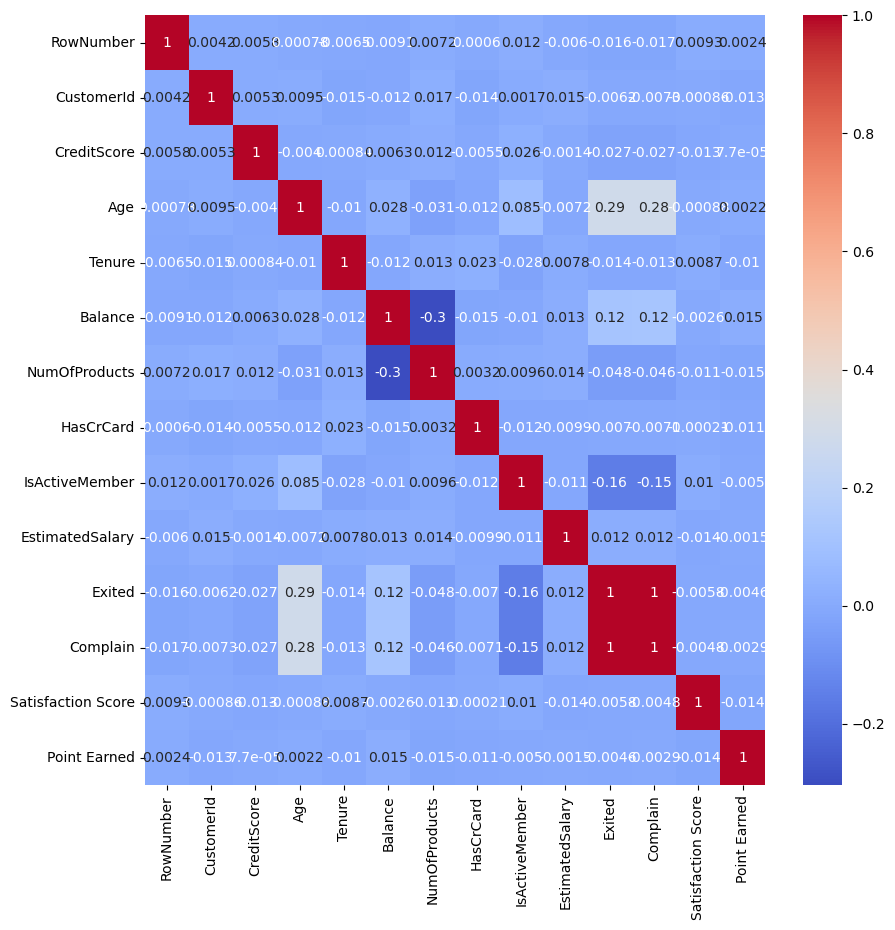

In [2]:
# PREPROCESS STEP WITH EDA
#VISUALIZE THE CORRELATION MATRIX IN HEAT MAP

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\bank churn dataset\Customer-Churn-Records.csv")


print(df.head())  
print(df.shape)  
print(df.info()) 


print(df.describe())

# IDENTIFY MISSING VAKUES

print(df.isna().sum())

# CHECK THE TARGET VARIAVBLE CHURN
print(df['Exited'].value_counts(normalize=True))


print(df.corr())

corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [5]:
#using handling missing data, encoding categorical variables, and scaling numerical features.


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# CALCULATE THE EXITED RATE
exited_rate = df['Exited'].sum() / df.shape[0]

print("Exited Rate:", exited_rate)
 
# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\bank churn dataset\Customer-Churn-Records.csv")


#FEATURE SELECT
df_selected = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']]


#IDENTIFYING MISSING VALUES
print(df.isnull().sum())


# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP THE GEOGRAPHY COLUMN
df.drop('Geography', axis=1, inplace=True)



# ONE HOT ENCODEING
df = pd.get_dummies(df, columns=['Gender', 'Age'])


# Handle outliers
df = handle_outliers(df, 'Exited')


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



print(df)
print(df.shape[0])

Exited Rate: 0.0
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_9416\139822700.py:39: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


      RowNumber  CustomerId    Surname  CreditScore    Tenure   Balance  \
1     -1.737051   -0.611274       Hill    -0.458344 -1.400118  0.176062   
3     -1.736359    0.142000       Boni     0.493101 -1.400118 -1.157446   
4     -1.736013    0.651227   Mitchell     2.071871 -1.052934  0.839619   
6     -1.735321   -1.374821   Bartlett     1.779119  0.682988 -1.157446   
8     -1.734630    1.410550         He    -1.577075 -0.358565  1.102799   
...         ...         ...        ...          ...       ...       ...   
9993   1.719015   -1.699099     Rahman    -0.081948  0.682988  1.309797   
9994   1.719361    0.392056       Wood     1.549100 -1.052934 -1.157446   
9995   1.719706   -1.183893   Obijiaku     1.245892 -0.011381 -1.157446   
9996   1.720052   -1.690373  Johnstone    -1.420244  1.724541 -0.244610   
9999   1.721090   -0.875993     Walker     1.465456 -0.358565  0.913321   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
1         -1.068105  -1.553

Exited Rate: 0.0
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_9416\2882706769.py:39: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


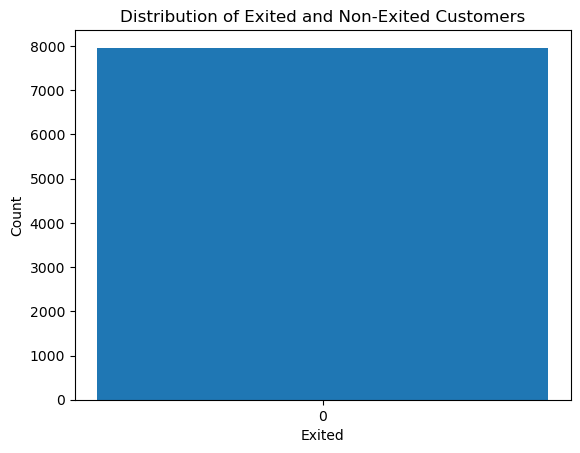

In [11]:
# VISUALIZE EXITED AND NON EXITED CUSTOMER IN BAR CHART

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt



# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# CALCULATE THE EXITED RATE
exited_rate = df['Exited'].sum() / df.shape[0]

print("Exited Rate:", exited_rate)
 
# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\bank churn dataset\Customer-Churn-Records.csv")


#FEATURE SELECT
df_selected = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']]


#IDENTIFYING MISSING VALUES
print(df.isnull().sum())


# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP THE GEOGRAPHY COLUMN
df.drop('Geography', axis=1, inplace=True)



# ONE HOT ENCODEING
df = pd.get_dummies(df, columns=['Gender', 'Age'])


# Handle outliers
df = handle_outliers(df, 'Exited')


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# CALCULATE THE COUNT  OF  EACH  UNIQUE VALUE IN THE EXITED COLUMN
exit_counts = df['Exited'].value_counts()

# BAR CHART
fig, ax = plt.subplots()
ax.bar(exit_counts.index, exit_counts.values)
ax.set_xlabel('Exited')
ax.set_ylabel('Count')
ax.set_title('Distribution of Exited and Non-Exited Customers')

# THIS CONDITION REASON OF WHEN ONLY ONE CATEGORY IN EXITED COLUMN
if len(exit_counts) == 1:
    ax.set_xticks(exit_counts.index)
else:
    ax.set_xticks(exit_counts.index)
    ax.set_xticklabels(['Not Exited', 'Exited'])

plt.show()


Exited Rate: 0.0
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_9416\2675670213.py:38: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


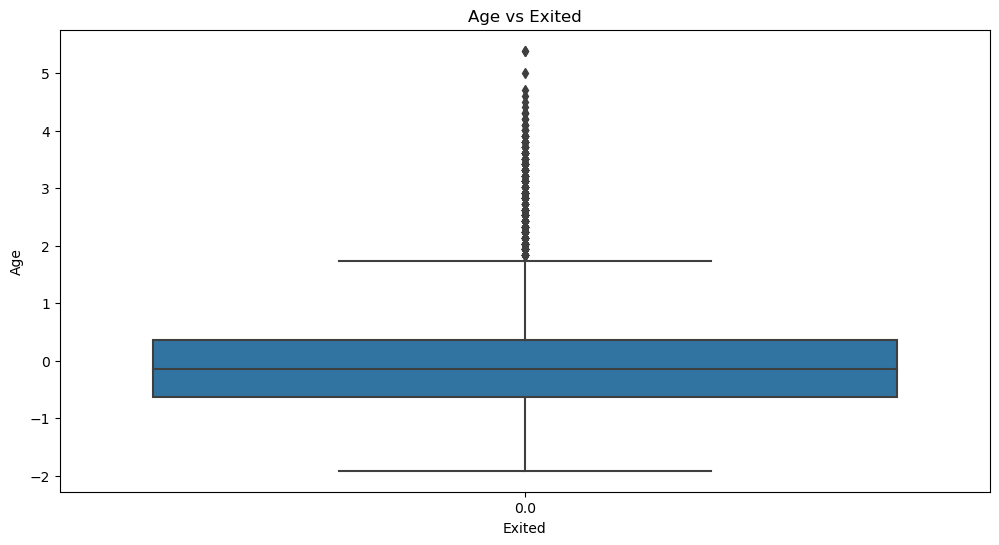

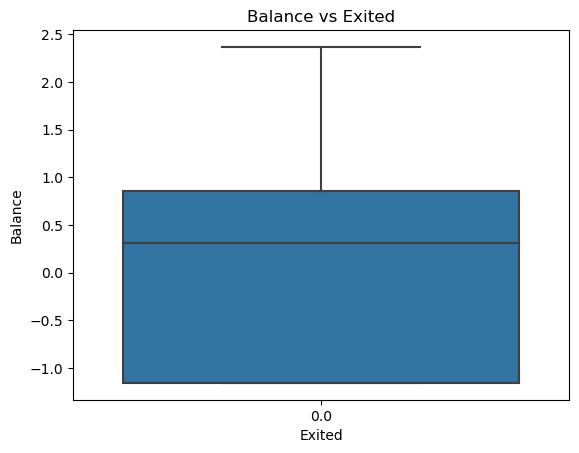

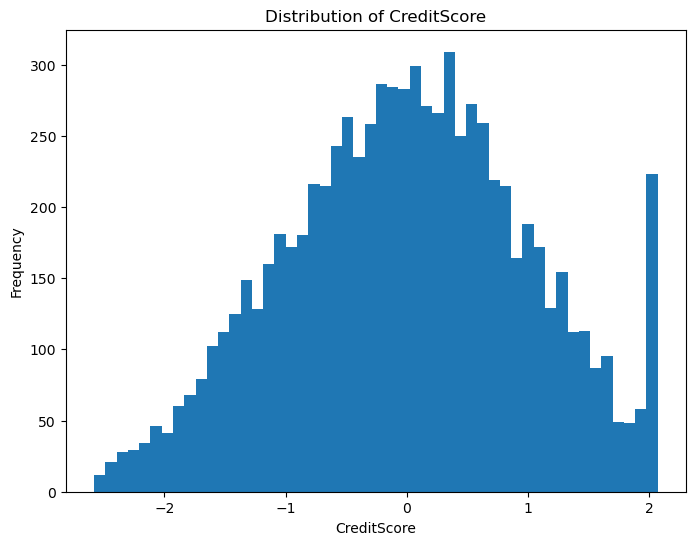

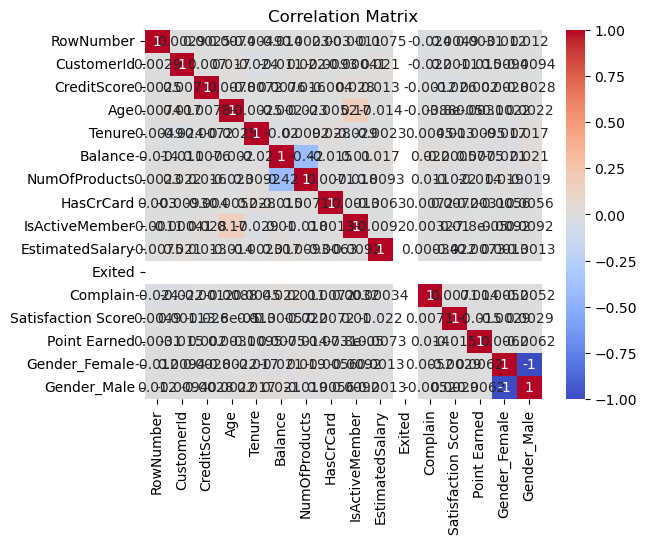

In [14]:

# FEATURE EXPLORATION

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# CALCULATE THE EXITED RATE
exited_rate = df['Exited'].sum() / df.shape[0]

print("Exited Rate:", exited_rate)
 
# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\bank churn dataset\Customer-Churn-Records.csv")


#FEATURE SELECT
df_selected = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']]


#IDENTIFYING MISSING VALUES
print(df.isnull().sum())


# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP THE GEOGRAPHY COLUMN
df.drop('Geography', axis=1, inplace=True)



# ONE HOT ENCODEING
df = pd.get_dummies(df, columns=['Gender'])


# Handle outliers
df = handle_outliers(df, 'Exited')


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# FEATURE EXPLORATION

plt.figure(figsize=(12, 6))

# CREATED BOX PLOT AGE VS EXITED

sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Exited')
plt.show()

# CREATED BOX PLOT BL VS EXITED

sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Exited')
plt.show()

# CREATED HISTOGRAM FOR CREDITSCORE

df['CreditScore'].plot(kind='hist', bins=50, figsize=(8, 6))
plt.title('Distribution of CreditScore')
plt.xlabel('CreditScore')
plt.show()

# CORRELATION MATRIX OF NUMERICAL COLUMN
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()